<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 4.8 MB/s eta 0:00:00


In [1]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [21]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [26]:
df = pd.read_csv(r"/content/data_4041_20230502.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

,1_Tumba,2_Tullinge,3_Flemingsberg,4_Huddinge,5_Stuvsta,6_Älvsjö,7_Årstaberg,8_Stockholms södra,9_Stockholm City,10_Stockholm Odenplan,11_Solna,12_Ulriksdal,13_Helenelund,14_Sollentuna,15_Häggvik,16_Norrviken,17_Rotebro,18_Upplands Väsby,Departure_Time
0_40,18.0,10.0,22.0,10.0,-18.0,-64.0,-40.0,-31.0,-20.0,21.0,187.0,144.0,153.0,145.0,89.0,84.0,43.0,32.0,18600.0
1_41,-59.0,-63.0,-49.0,-58.0,-75.0,-107.0,-54.0,-61.0,-46.0,-9.0,144.0,78.0,77.0,43.0,-25.0,8.0,-38.0,-64.0,19500.0
2_40,17.0,19.0,30.0,27.0,2.0,-36.0,-25.0,-31.0,0.0,-11.0,-24.0,-53.0,-23.0,-30.0,-79.0,-64.0,-63.0,-53.0,20400.0
3_41,176.0,133.0,108.0,72.0,17.0,-58.0,-74.0,-68.0,-65.0,7.0,-71.0,-99.0,-52.0,-86.0,-125.0,-36.0,-97.0,-72.0,21300.0
4_41,112.0,112.0,116.0,100.0,77.0,43.0,45.0,47.0,54.0,7.0,-29.0,-66.0,-33.0,-52.0,-106.0,-16.0,-43.0,-52.0,21720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91_41,-40.0,-19.0,-25.0,-18.0,-37.0,-82.0,-53.0,-51.0,-53.0,-31.0,-66.0,-88.0,-35.0,-54.0,-114.0,-25.0,-62.0,-65.0,82500.0
92_40,20.0,18.0,41.0,33.0,5.0,-49.0,-21.0,-17.0,-10.0,-6.0,-19.0,-61.0,-19.0,-22.0,-72.0,-52.0,-59.0,-52.0,83400.0
93_41,-68.0,-66.0,-40.0,-39.0,-54.0,-85.0,-29.0,-7.0,20.0,4.0,-35.0,-43.0,2.0,-2.0,-45.0,23.0,5.0,-11.0,84300.0
94_40,-32.0,-62.0,-58.0,-71.0,-89.0,-114.0,-60.0,-53.0,-49.0,-36.0,-82.0,-29.0,728.0,690.0,619.0,607.0,553.0,509.0,85200.0


In [28]:
df = df.drop(columns=["Departure_Time"])
dataframe = pp.DataFrame(data = df.values, var_names = df.index)
df

,1_Tumba,2_Tullinge,3_Flemingsberg,4_Huddinge,5_Stuvsta,6_Älvsjö,7_Årstaberg,8_Stockholms södra,9_Stockholm City,10_Stockholm Odenplan,11_Solna,12_Ulriksdal,13_Helenelund,14_Sollentuna,15_Häggvik,16_Norrviken,17_Rotebro,18_Upplands Väsby
0_40,18.0,10.0,22.0,10.0,-18.0,-64.0,-40.0,-31.0,-20.0,21.0,187.0,144.0,153.0,145.0,89.0,84.0,43.0,32.0
1_41,-59.0,-63.0,-49.0,-58.0,-75.0,-107.0,-54.0,-61.0,-46.0,-9.0,144.0,78.0,77.0,43.0,-25.0,8.0,-38.0,-64.0
2_40,17.0,19.0,30.0,27.0,2.0,-36.0,-25.0,-31.0,0.0,-11.0,-24.0,-53.0,-23.0,-30.0,-79.0,-64.0,-63.0,-53.0
3_41,176.0,133.0,108.0,72.0,17.0,-58.0,-74.0,-68.0,-65.0,7.0,-71.0,-99.0,-52.0,-86.0,-125.0,-36.0,-97.0,-72.0
4_41,112.0,112.0,116.0,100.0,77.0,43.0,45.0,47.0,54.0,7.0,-29.0,-66.0,-33.0,-52.0,-106.0,-16.0,-43.0,-52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91_41,-40.0,-19.0,-25.0,-18.0,-37.0,-82.0,-53.0,-51.0,-53.0,-31.0,-66.0,-88.0,-35.0,-54.0,-114.0,-25.0,-62.0,-65.0
92_40,20.0,18.0,41.0,33.0,5.0,-49.0,-21.0,-17.0,-10.0,-6.0,-19.0,-61.0,-19.0,-22.0,-72.0,-52.0,-59.0,-52.0
93_41,-68.0,-66.0,-40.0,-39.0,-54.0,-85.0,-29.0,-7.0,20.0,4.0,-35.0,-43.0,2.0,-2.0,-45.0,23.0,5.0,-11.0
94_40,-32.0,-62.0,-58.0,-71.0,-89.0,-114.0,-60.0,-53.0,-49.0,-36.0,-82.0,-29.0,728.0,690.0,619.0,607.0,553.0,509.0


In [29]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

cond_ind_test=gpdc
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 1
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 1
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable 0_40 has 1 link(s):
    [pc_alpha = 0.4]
        (0_40 -1): max_pval = 0.40000, |min_val| =  0.160

    Variable 1_41 has 1 link(s):
    [pc_alpha = 0.5]
        (0_40 -1): max_pval = 0.48400, |min_val| =  0.153

    Variable 2_40 has 2 link(s):
    [pc_alpha = 0.5]
        (1_41 -1): max_pval = 0.30200, |min_val| =  0.170
        (9_41 -1): max_pval = 0.44800, |min_val| =  0.156

    Variable 3_41 has 2 link(s):
    [pc_alpha = 0.5]
        (6_41 -1): max_pval = 0.20400, |min_val| =  0.184
        (9_41 -1): max_pval = 0.46200, |min_val| =  0.154

    Variable 4_41 has 1 link(s):
    [pc_alpha = 0.3]
        (6_41 -1): max_pval = 0.26800, |min_val| =  0.175

    Variable 5_40 has 1 link(s):
    [pc_alpha = 0.3]
        (6_41 -1): max_pval = 0.27600, |min_val| =  0.173

    Variable 6_41 has 5 link(s):
    [pc_alpha = 0.5]
        (14_41 -1): max_pval = 0.33600, |min_val| =  0.165
        (4_41 -1): max_pval = 0.38400, |min_val| = 

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarni


## Significant links at alpha = 0.05:

    Variable 0_40 has 10 link(s):
        (1_41  0): pval = 0.00000 | val =  0.858 | unoriented link
        (4_41  0): pval = 0.00000 | val =  0.687 | unoriented link
        (2_40  0): pval = 0.00000 | val =  0.675 | unoriented link
        (5_40  0): pval = 0.00000 | val =  0.627 | unoriented link
        (3_41  0): pval = 0.00000 | val =  0.581 | unoriented link
        (6_41  0): pval = 0.00000 | val =  0.544 | unoriented link
        (8_40  0): pval = 0.00000 | val =  0.459 | unoriented link
        (7_41  0): pval = 0.00000 | val =  0.381 | unoriented link
        (6_41 -1): pval = 0.00600 | val =  0.308
        (0_40 -1): pval = 0.04800 | val =  0.246

    Variable 1_41 has 15 link(s):
        (2_40  0): pval = 0.00000 | val =  0.945 | unoriented link
        (0_40  0): pval = 0.00000 | val =  0.858 | unoriented link
        (3_41  0): pval = 0.00000 | val =  0.847 | unoriented link
        (4_41  0): pval = 0.00000 | val =  0.835 | unori

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

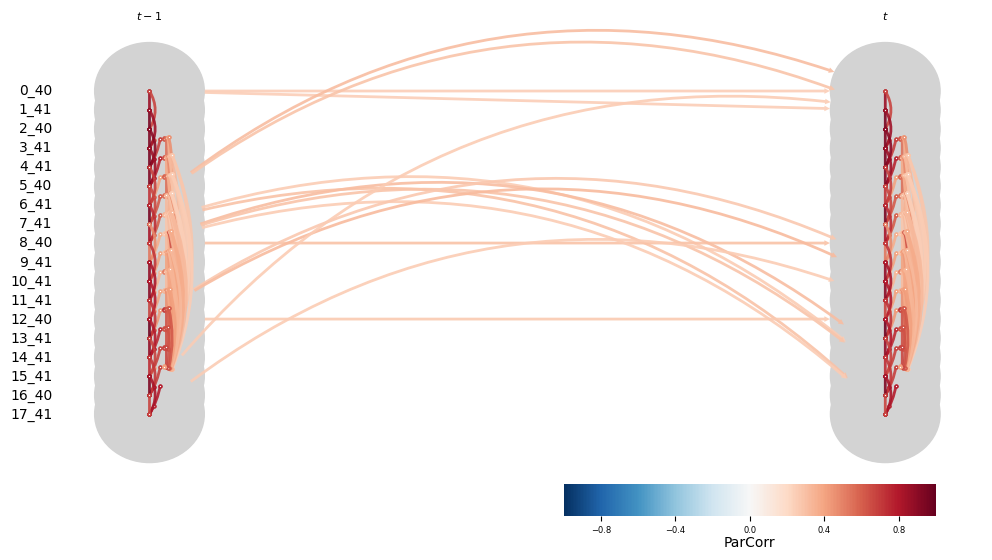

In [30]:
# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)

# 绘图
plot_time_series_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 偏相关值/测试统计值
    var_names=dataframe.var_names,                # 节点名字
    link_colorbar_label='ParCorr',                # 显示偏相关值的图例
    figsize=(12, 6),                              # 图像大小
    alpha=0.9,                                    # 边透明度
    arrow_linewidth=2.0,                          # 箭头线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.3                             # 边曲率
)

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

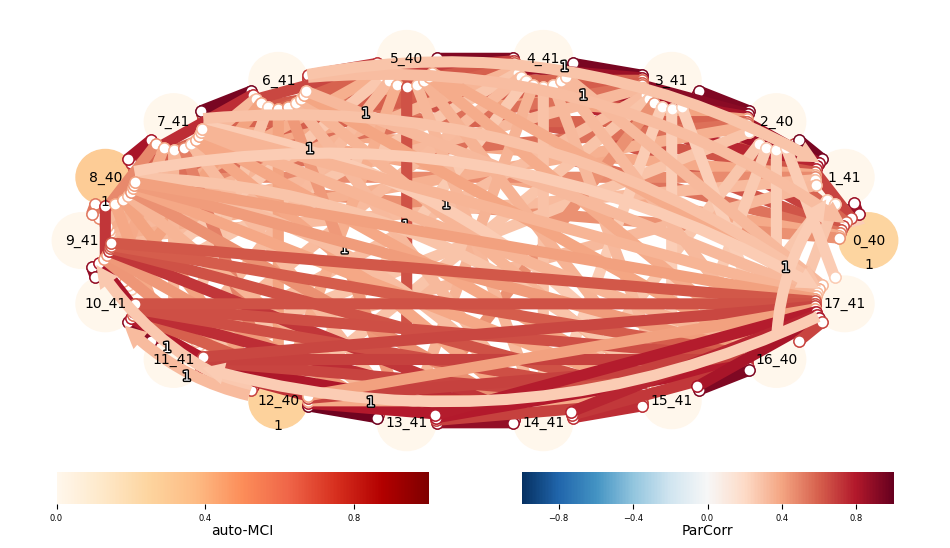

In [31]:
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='ParCorr',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=8.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=10,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)